In [16]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

from sklearn import datasets

In [17]:
from sqlalchemy import create_engine
#import sqlalchemy
#print (sqlalchemy.__version__)

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heart_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [18]:
# Define the features and the outcome
X = heart_df.iloc[:, :13]
y = heart_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [14]:
print(X)

        0    1    2      3      4    5    6      7    8    9   10   11   12
0    63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0
1    67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0
2    67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0
3    37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0
4    41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0
..    ...  ...  ...    ...    ...  ...  ...    ...  ...  ...  ...  ...  ...
298  45.0  1.0  1.0  110.0  264.0  0.0  0.0  132.0  0.0  1.2  2.0  0.0  7.0
299  68.0  1.0  4.0  144.0  193.0  1.0  0.0  141.0  0.0  3.4  2.0  2.0  7.0
300  57.0  1.0  4.0  130.0  131.0  0.0  0.0  115.0  1.0  1.2  2.0  1.0  7.0
301  57.0  0.0  2.0  130.0  236.0  0.0  2.0  174.0  0.0  0.0  2.0  1.0  3.0
302  38.0  1.0  3.0  138.0  175.0  0.0  0.0  173.0  0.0  0.0  1.0    0  3.0

[303 rows x 13 columns]


In [15]:
print(heart_df)

        0    1    2      3      4    5    6      7    8    9   10   11   12  \
0    63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   
1    67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   
2    67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   
3    37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   
4    41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   
..    ...  ...  ...    ...    ...  ...  ...    ...  ...  ...  ...  ...  ...   
298  45.0  1.0  1.0  110.0  264.0  0.0  0.0  132.0  0.0  1.2  2.0  0.0  7.0   
299  68.0  1.0  4.0  144.0  193.0  1.0  0.0  141.0  0.0  3.4  2.0  2.0  7.0   
300  57.0  1.0  4.0  130.0  131.0  0.0  0.0  115.0  1.0  1.2  2.0  1.0  7.0   
301  57.0  0.0  2.0  130.0  236.0  0.0  2.0  174.0  0.0  0.0  2.0  1.0  3.0   
302  38.0  1.0  3.0  138.0  175.0  0.0  0.0  173.0  0.0  0.0  1.0    ?  3.0   

     13  
0     0  
1     2  
2     1  
3     0  
4

## Standardize Data

In [20]:

#Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
print (X_std)

[[ 0.94872647  0.68620244 -2.25177456 ...  2.27457861 -0.71113139
   0.65913253]
 [ 1.39200191  0.68620244  0.87798549 ...  0.64911323  2.5048807
  -0.86542592]
 [ 1.39200191  0.68620244  0.87798549 ...  0.64911323  1.43287667
   1.16731868]
 ...
 [ 0.28381332  0.68620244  0.87798549 ...  0.64911323  0.36087264
   1.16731868]
 [ 0.28381332 -1.4572959  -1.20852121 ...  0.64911323  0.36087264
  -0.86542592]
 [-1.82174501  0.68620244 -0.16526786 ... -0.97635214 -0.71113139
  -0.86542592]]


## K-Means

19.8 ms ± 842 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


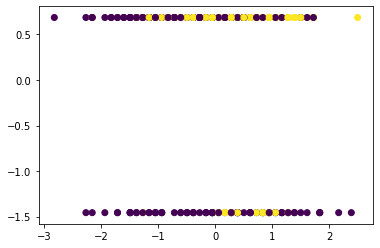

In [23]:
k_means = KMeans(n_clusters=2, random_state=123)
%timeit k_means.fit(X_std)
y_pred = k_means.predict(X_std)

# Plot the solution.
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.show()

## MiniBatch

13.6 ms ± 3.66 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


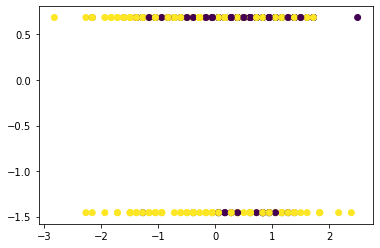

In [24]:
mini_batch_k_means = MiniBatchKMeans(n_clusters=2, random_state=123)
%timeit mini_batch_k_means.fit(X_std)
y_pred_mini = mini_batch_k_means.predict(X_std)

# Plot the solution.
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred_mini)
plt.show()

### Notes:
Note that in this case, we actually know the correct number of clusters in the data which is two. But, you'll test whether k-means will assign observations as we expect it to do. Since k-means is an unsupervised learning algorithm, it will be blind to whether or not patients have heart disease.